In [1]:
import pandas as pd

ataque = pd.read_csv("datos/UNSW_NB15.csv")

ataque.drop(columns=["id","dur","proto","service","state","sinpkt","dinpkt","sjit","djit","swin","stcpb","dtcpb","dwin","tcprtt","synack","ackdat","smean","dmean","trans_depth","response_body_len","ct_srv_src","ct_state_ttl","ct_dst_ltm","ct_src_dport_ltm","ct_dst_sport_ltm","ct_dst_src_ltm","is_ftp_login","ct_ftp_cmd","ct_flw_http_mthd","ct_src_ltm","ct_srv_dst"], inplace=True)

ataque.sample(frac=2/3, replace=True)
ataque.sample(frac=2/3, replace=True)
ataque.sample(frac=2/3, replace=True)
ataque.sample(frac=2/3, replace=True)
ataque.sample(frac=2/3, replace=True)

,spkts,dpkts,sbytes,dbytes,rate,sttl,dttl,sload,dload,sloss,dloss,is_sm_ips_ports,attack_cat,label
118116,2,0,200,0,111111.107200,254,0,8.888889e+07,0.00000,0,0,0,DoS,1
8366,22,14,1470,1728,239.926511,31,29,7.699584e+04,88018.75781,5,4,0,Normal,0
148298,2,0,114,0,142857.140900,254,0,6.514286e+07,0.00000,0,0,0,Generic,1
4591,14,8,8928,424,153.555917,31,29,4.850027e+05,21702.57031,4,1,0,Normal,0
27240,122,126,7818,15180,818.911195,31,29,2.056628e+05,399443.00000,30,32,0,Normal,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27815,2,2,130,162,2976.190500,31,29,5.158730e+05,642857.12500,0,0,0,Normal,0
57986,2,0,200,0,333333.321500,254,0,2.666667e+08,0.00000,0,0,0,DoS,1
158545,2,0,114,0,125000.000300,254,0,5.700000e+07,0.00000,0,0,0,Generic,1
124,16,18,1540,1644,1776.677132,31,29,6.219447e+05,668892.00000,4,4,0,Normal,0


In [2]:
pruebas = pd.read_csv("datos/UNSW_NB15_training-set.csv")
pruebas.drop(columns=["proto",'service','state'], inplace=True)
pruebas

,id,dur,spkts,dpkts,sbytes,dbytes,rate,sttl,dttl,sload,...,ct_dst_sport_ltm,ct_dst_src_ltm,is_ftp_login,ct_ftp_cmd,ct_flw_http_mthd,ct_src_ltm,ct_srv_dst,is_sm_ips_ports,attack_cat,label
0,1,0.000011,2,0,496,0,90909.090200,254,0,1.803636e+08,...,1,2,0,0,0,1,2,0,Normal,0
1,2,0.000008,2,0,1762,0,125000.000300,254,0,8.810000e+08,...,1,2,0,0,0,1,2,0,Normal,0
2,3,0.000005,2,0,1068,0,200000.005100,254,0,8.544000e+08,...,1,3,0,0,0,1,3,0,Normal,0
3,4,0.000006,2,0,900,0,166666.660800,254,0,6.000000e+08,...,1,3,0,0,0,2,3,0,Normal,0
4,5,0.000010,2,0,2126,0,100000.002500,254,0,8.504000e+08,...,1,3,0,0,0,2,3,0,Normal,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
82327,82328,0.000005,2,0,104,0,200000.005100,254,0,8.320000e+07,...,1,2,0,0,0,2,1,0,Normal,0
82328,82329,1.106101,20,8,18062,354,24.410067,254,252,1.241044e+05,...,1,1,0,0,0,3,2,0,Normal,0
82329,82330,0.000000,1,0,46,0,0.000000,0,0,0.000000e+00,...,1,1,0,0,0,1,1,1,Normal,0
82330,82331,0.000000,1,0,46,0,0.000000,0,0,0.000000e+00,...,1,1,0,0,0,1,1,1,Normal,0


In [3]:
from sklearn.ensemble import RandomForestClassifier

forest = RandomForestClassifier(n_estimators=2, criterion="gini", max_features="sqrt", bootstrap=True, max_samples=2/3, oob_score=True)

forest.fit(ataque[ataque.columns[[0,1,2]]].values, ataque["attack_cat"].values)


#print(forest.predict(pruebas))


print("Exactitud del Entrenamiento: \b")
print(forest.score(ataque[ataque.columns[[0,1,2]]].values, ataque["attack_cat"].values))
print("Exactitud en Pruebas: \b")
print(forest.oob_score_)

C:\Users\adali\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\ensemble\_forest.py:583: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(


Exactitud del Entrenamiento:
0.8164148715930672
Exactitud en Pruebas:
0.6113744075829384


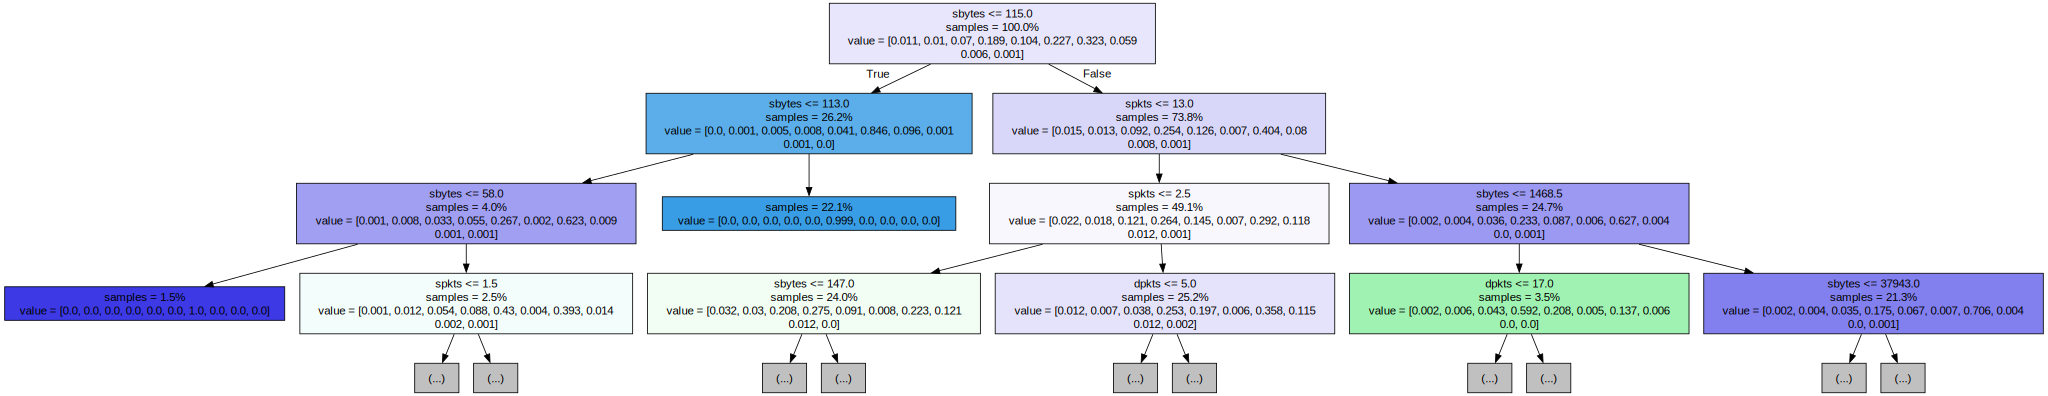

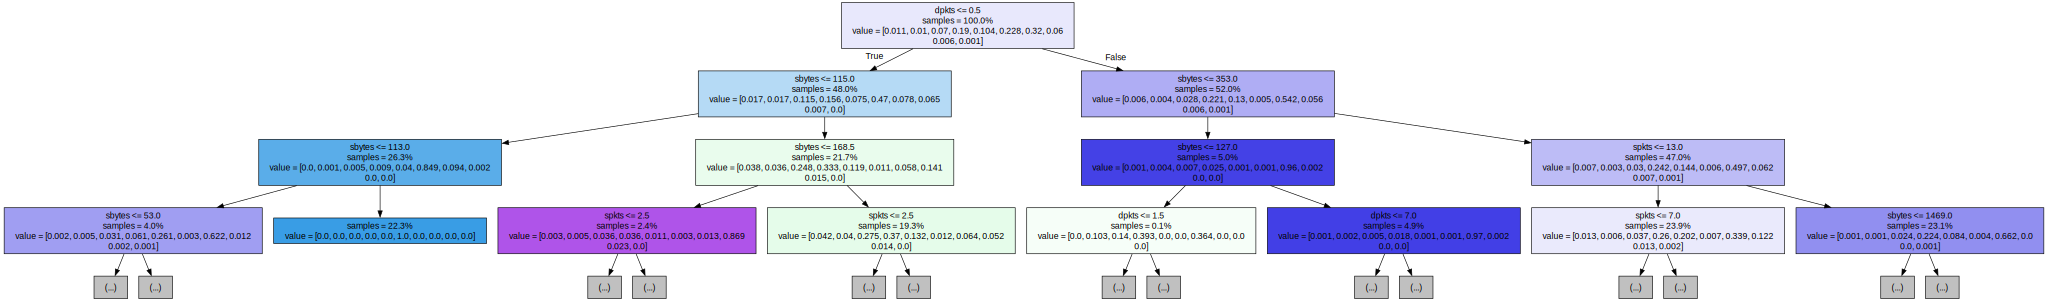

In [6]:
# Tree Visualisation
from sklearn.tree import export_graphviz
from IPython.display import Image
import graphviz



for i in range(2):
    tree = forest.estimators_[i]
    dot_data = export_graphviz(tree,
                               feature_names=ataque[ataque.columns[[0,1,2]]].columns,  
                               filled=True,  
                               max_depth=3, 
                               impurity=False, 
                               proportion=True)
    graph = graphviz.Source(dot_data)
    display(graph)

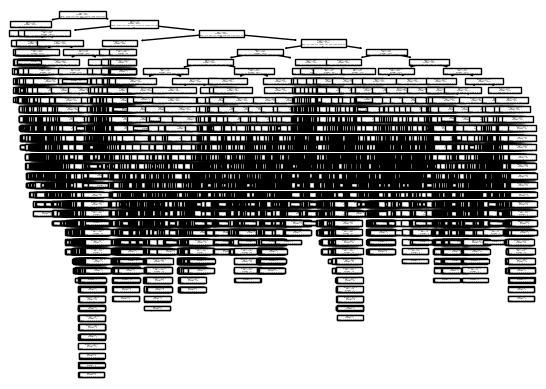

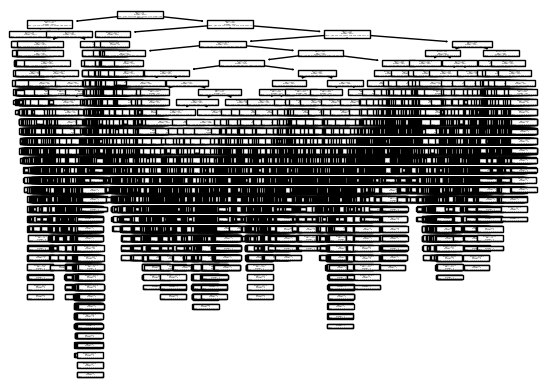

In [17]:
import matplotlib.pyplot as plt 
from sklearn import tree

for arbol in forest.estimators_:
    tree.plot_tree(arbol, feature_names=ataque.columns[[0,1,2]])
    plt.show()

In [33]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score


def metricas(reales, predichas):
    #matriz = confusion_matrix(reales, predichas)
    exactitud = accuracy_score(reales, predichas)
    precision = precision_score(reales, predichas, average='macro')
    recall = recall_score(reales, predichas, average='macro')
    f1score = f1_score(reales, predichas, average='macro')
    return exactitud, precision, recall, f1score


def visualizar_metricas(reales, predichas, titulo):
    matriz, exactitud, precision, recall, f1score = \
        metricas(reales, predichas)

    plt.figure(figsize=(3, 3))
    matriz = pd.DataFrame(matriz, 
                          columns=["0 : No DDoS", "1 : Sí es DDoS"])
    plt.matshow(matriz, cmap="Blues", vmin=0, vmax=10, fignum=1)
    plt.title("Reales")
    plt.ylabel("Predichas")
    plt.xticks(range(len(matriz.columns)), matriz.columns, rotation=45)
    plt.yticks(range(len(matriz.columns)), matriz.columns)
    etiquetas = (("Verdaderos\nnegativos", "Falsos\npositivos"),
                 ("Falsos\nnegativos", "Verdaderos\npositivos"))
    for i in range(len(matriz.columns)):
        for j in range(len(matriz.columns)):
            plt.text(i, j + 0.14, str(matriz.iloc[i, j]),
                     fontsize=30, ha="center", va="center")
            plt.text(i, j - 0.25, etiquetas[i][j],
                     fontsize=11.5, ha="center", va="center")           
    plt.text(1.60, -0.30, titulo, fontsize=25, c="red")
    plt.text(2.1, 0.10, "Accuracy: %0.2f" % exactitud, fontsize=20)
    plt.text(2.1, 0.40, "Precision: %0.2f" % precision, fontsize=20)
    plt.text(2.1, 0.70, "Recall: %0.2f" % recall, fontsize=20)
    plt.text(2.1, 1.00, "F1: %0.2f" % f1score, fontsize=20)    
    plt.show()
    print("\n" * 10)


pred = forest.predict(pruebas[pruebas.columns[[0,1,2]]].values)

In [36]:
class_labels = list(set(pruebas["attack_cat"].values))

class_labels


['Worms',
 'Exploits',
 'Normal',
 'Generic',
 'Fuzzers',
 'Backdoor',
 'Shellcode',
 'Analysis',
 'Reconnaissance',
 'DoS']

In [35]:
metricas(pruebas["attack_cat"].values, pred)

#precision = precision_score(pruebas["attack_cat"].values, pred, average='macro')
#precision
#recall = f1_score(pruebas["attack_cat"].values, pred, average='macro')
#recall

C:\Users\adali\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


(0.4184885585191663,
 0.058171765329795455,
 0.09566944675825048,
 0.0639527135972593)

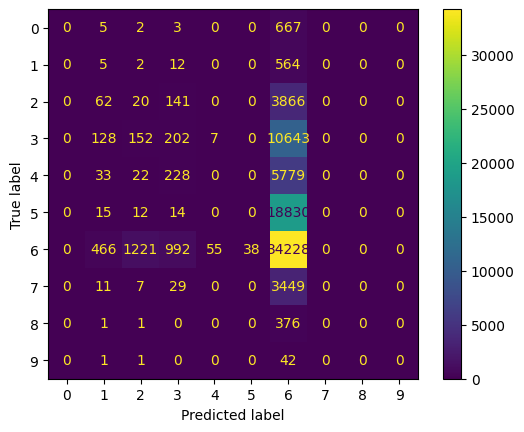

In [23]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt 

confusion_matrix= confusion_matrix(pruebas["attack_cat"].values, pred)

cm_display = ConfusionMatrixDisplay(confusion_matrix = confusion_matrix)
cm_display.plot()
plt.show()

In [19]:
print(forest.estimators_[1])

DecisionTreeClassifier(max_features='sqrt', random_state=1626874464)
